In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR
import statsmodels.api as sm

In [2]:
df = pd.read_csv('./Beijing.csv')
df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,O3,CO,TEMP,PRES,RAIN,HUMI,DEWP,WD,WS
0,2014,1,1,0,31.0,117.0,15.0,73.0,NaN,NaN,-0.4,1009.1,0.0,34.0,-14.4,NW,1.2
1,2014,1,1,1,58.0,154.0,39.0,84.0,4.0,1.5,-1.1,1008.8,0.0,40.0,-13.0,NW,1.2
2,2014,1,1,2,68.0,162.0,39.0,85.0,4.0,1.7,-1.4,1008.8,0.0,41.0,-13.0,SW,0.7
3,2014,1,1,3,83.0,189.0,63.0,83.0,5.0,1.7,-2.4,1008.2,0.0,46.0,-12.5,SE,0.6
4,2014,1,1,4,75.0,190.0,55.0,83.0,3.0,2.1,-2.5,1008.0,0.0,46.0,-12.6,CV,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2015,12,31,19,112.0,112.0,28.0,114.0,23.0,2.3,-1.4,1026.3,0.0,58.0,-8.6,SE,1.0
17516,2015,12,31,20,122.0,132.0,27.0,118.0,26.0,3.2,-2.5,1026.2,0.0,64.0,-8.4,SE,1.3
17517,2015,12,31,21,149.0,179.0,30.0,125.0,31.0,4.5,-2.7,1025.8,0.0,67.0,-8.0,NE,0.9
17518,2015,12,31,22,196.0,230.0,29.0,130.0,33.0,4.6,-3.5,1025.5,0.0,73.0,-7.6,CV,0.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    17520 non-null  int64  
 1   month   17520 non-null  int64  
 2   day     17520 non-null  int64  
 3   hour    17520 non-null  int64  
 4   PM2.5   17077 non-null  float64
 5   PM10    17212 non-null  float64
 6   SO2     17198 non-null  float64
 7   NO2     17064 non-null  float64
 8   O3      17193 non-null  float64
 9   CO      17122 non-null  float64
 10  TEMP    17518 non-null  float64
 11  PRES    17518 non-null  float64
 12  RAIN    17518 non-null  float64
 13  HUMI    17518 non-null  float64
 14  DEWP    17518 non-null  float64
 15  WD      17518 non-null  object 
 16  WS      17518 non-null  float64
dtypes: float64(12), int64(4), object(1)
memory usage: 2.3+ MB


In [4]:
import datetime
df['time'] = df.apply(lambda x : datetime.datetime(year=x['year'], month=x['month'], day=x['day'], hour=x['hour']), axis=1)
df.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)
df = df.set_index('time')
df

,PM2.5,PM10,SO2,NO2,O3,CO,TEMP,PRES,RAIN,HUMI,DEWP,WD,WS
time,,,,,,,,,,,,,
2014-01-01 00:00:00,31.0,117.0,15.0,73.0,NaN,NaN,-0.4,1009.1,0.0,34.0,-14.4,NW,1.2
2014-01-01 01:00:00,58.0,154.0,39.0,84.0,4.0,1.5,-1.1,1008.8,0.0,40.0,-13.0,NW,1.2
2014-01-01 02:00:00,68.0,162.0,39.0,85.0,4.0,1.7,-1.4,1008.8,0.0,41.0,-13.0,SW,0.7
2014-01-01 03:00:00,83.0,189.0,63.0,83.0,5.0,1.7,-2.4,1008.2,0.0,46.0,-12.5,SE,0.6
2014-01-01 04:00:00,75.0,190.0,55.0,83.0,3.0,2.1,-2.5,1008.0,0.0,46.0,-12.6,CV,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,112.0,112.0,28.0,114.0,23.0,2.3,-1.4,1026.3,0.0,58.0,-8.6,SE,1.0
2015-12-31 20:00:00,122.0,132.0,27.0,118.0,26.0,3.2,-2.5,1026.2,0.0,64.0,-8.4,SE,1.3
2015-12-31 21:00:00,149.0,179.0,30.0,125.0,31.0,4.5,-2.7,1025.8,0.0,67.0,-8.0,NE,0.9


In [7]:
df['WD'] = df['WD'].fillna(method='ffill')
df['WD'].unique()

array(['NW', 'SW', 'SE', 'CV', 'NE'], dtype=object)

In [8]:
df = df.join(pd.get_dummies(df['WD'])) # one-hot encoding
del df['WD']
df.head()

,PM2.5,PM10,SO2,NO2,O3,CO,TEMP,PRES,RAIN,HUMI,DEWP,WS,CV,NE,NW,SE,SW
time,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,31.0,117.0,15.0,73.0,NaN,NaN,-0.4,1009.1,0.0,34.0,-14.4,1.2,0,0,1,0,0
2014-01-01 01:00:00,58.0,154.0,39.0,84.0,4.0,1.5,-1.1,1008.8,0.0,40.0,-13.0,1.2,0,0,1,0,0
2014-01-01 02:00:00,68.0,162.0,39.0,85.0,4.0,1.7,-1.4,1008.8,0.0,41.0,-13.0,0.7,0,0,0,0,1
2014-01-01 03:00:00,83.0,189.0,63.0,83.0,5.0,1.7,-2.4,1008.2,0.0,46.0,-12.5,0.6,0,0,0,1,0
2014-01-01 04:00:00,75.0,190.0,55.0,83.0,3.0,2.1,-2.5,1008.0,0.0,46.0,-12.6,0.4,1,0,0,0,0


In [11]:
df2=df[['CO','SO2','NO2','TEMP','RAIN','PRES']]
df2

,CO,SO2,NO2,TEMP,RAIN,PRES
time,,,,,,
2014-01-01 00:00:00,NaN,15.0,73.0,-0.4,0.0,1009.1
2014-01-01 01:00:00,1.5,39.0,84.0,-1.1,0.0,1008.8
2014-01-01 02:00:00,1.7,39.0,85.0,-1.4,0.0,1008.8
2014-01-01 03:00:00,1.7,63.0,83.0,-2.4,0.0,1008.2
2014-01-01 04:00:00,2.1,55.0,83.0,-2.5,0.0,1008.0
...,...,...,...,...,...,...
2015-12-31 19:00:00,2.3,28.0,114.0,-1.4,0.0,1026.3
2015-12-31 20:00:00,3.2,27.0,118.0,-2.5,0.0,1026.2
2015-12-31 21:00:00,4.5,30.0,125.0,-2.7,0.0,1025.8


In [12]:
df2.dtypes

CO      float64
SO2     float64
NO2     float64
TEMP    float64
RAIN    float64
PRES    float64
dtype: object

In [13]:
#missing value treatment
cols = df2.columns
for j in cols:
    df2[j]=df2[j].fillna(df2[j].interpolate())

'''或者用前一个小时的值来填充
#missing value treatment
cols = df2.columns
for j in cols:
    for i in range(0,len(df2)):
        if df2[j][i] is np.nan:
            df2[j][i] = df3[j][i-1]
'''

<ipython-input-13-879326d3fb0e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[j]=df2[j].fillna(df2[j].interpolate())


'或者用前一个小时的值来填充\n#missing value treatment\ncols = df2.columns\nfor j in cols:\n    for i in range(0,len(df2)):\n        if df2[j][i] is np.nan:\n            df2[j][i] = df3[j][i-1]\n'

In [14]:
df2.isnull ().sum ()

CO      1
SO2     0
NO2     0
TEMP    0
RAIN    0
PRES    0
dtype: int64

In [17]:
df2.iloc[0][0]=df2.iloc[0][1]

In [18]:
#划分数据集
train=df2[:int(0.8*(len(df2)))]
valid=df2[int(0.8*(len(df2))):]

In [19]:
#Granger's Causalit Test因果测试
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df2, variables = df2.columns)   


,CO_x,SO2_x,NO2_x,TEMP_x,RAIN_x,PRES_x
CO_y,1.0000,0.0000,0.0000,0.0,0.0009,0.0
SO2_y,0.0000,1.0000,0.0000,0.0,0.0000,0.0
NO2_y,0.0000,0.0000,1.0000,0.0,0.0002,0.0
TEMP_y,0.0000,0.0000,0.0000,1.0,0.0000,0.0
RAIN_y,0.4902,0.0003,0.0001,0.0,1.0000,0.0
PRES_y,0.0000,0.0000,0.0000,0.0,0.4567,1.0


In [20]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df2)


Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
CO     ::  4267.48   > 83.9383   =>   True
SO2    ::  2212.49   > 60.0627   =>   True
NO2    ::  1154.26   > 40.1749   =>   True
TEMP   ::  534.64    > 24.2761   =>   True
RAIN   ::  111.73    > 12.3212   =>   True
PRES   ::  0.01      > 4.1296    =>   False


In [21]:
#因为PRES是false,我们drop他看看
cointegration_test(df2.drop(['PRES'],axis=1))

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
CO     ::  3850.14   > 60.0627   =>   True
SO2    ::  1829.97   > 40.1749   =>   True
NO2    ::  837.4     > 24.2761   =>   True
TEMP   ::  230.82    > 12.3212   =>   True
RAIN   ::  27.08     > 4.1296    =>   True


In [22]:
from statsmodels.tsa.stattools import adfuller
#平稳性检验函数
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [23]:
#做平稳性检验
for name, column in train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "CO" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.8518
 No. Lags Chosen       = 38
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SO2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.4527
 No. Lags Chosen       = 40
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "NO2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 

In [24]:
#看到只有TEMP是不平稳的，所以对其做一阶差分
train_differenced=train
train_differenced['TEMP']=train['TEMP'].diff()
train_differenced=pd.DataFrame(train_differenced)

<ipython-input-24-e55ad1fa6ca5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_differenced['TEMP']=train['TEMP'].diff()


In [25]:
train_differenced['TEMP']=train_differenced['TEMP'].fillna(0)
train_differenced

,CO,SO2,NO2,TEMP,RAIN,PRES
time,,,,,,
2014-01-01 00:00:00,15.0,15.0,73.0,0.0,0.0,1009.1
2014-01-01 01:00:00,1.5,39.0,84.0,-0.7,0.0,1008.8
2014-01-01 02:00:00,1.7,39.0,85.0,-0.3,0.0,1008.8
2014-01-01 03:00:00,1.7,63.0,83.0,-1.0,0.0,1008.2
2014-01-01 04:00:00,2.1,55.0,83.0,-0.1,0.0,1008.0
...,...,...,...,...,...,...
2015-08-07 19:00:00,0.8,2.0,13.0,-2.1,6.9,1008.2
2015-08-07 20:00:00,0.6,2.0,10.0,-2.8,36.6,1010.5
2015-08-07 21:00:00,0.7,2.0,33.0,0.5,0.3,1010.3


In [26]:
#一阶差分后再做一次平稳性检验
for name, column in train_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "CO" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.8518
 No. Lags Chosen       = 38
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SO2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.4527
 No. Lags Chosen       = 40
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "NO2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 

In [27]:
#寻找最优的lag
model = VAR(train_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')


Lag Order = 1
AIC :  6.553313091319593
BIC :  6.575932506622565
FPE :  701.5646758625061
HQIC:  6.560842940642379 

Lag Order = 2
AIC :  6.155200595428382
BIC :  6.197210681377903
FPE :  471.1613472984747
HQIC:  6.169185515981676 



C:\Users\10048\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


Lag Order = 3
AIC :  6.115437638439147
BIC :  6.176840795893325
FPE :  452.79416866222454
HQIC:  6.135878474713194 

Lag Order = 4
AIC :  6.079474152141475
BIC :  6.160272782433197
FPE :  436.79945418786906
HQIC:  6.106371748798245 

Lag Order = 5
AIC :  6.053772982363737
BIC :  6.15396948730079
FPE :  425.716241980069
HQIC:  6.087128184236969 

Lag Order = 6
AIC :  6.025776142019417
BIC :  6.1453729238846195
FPE :  413.9628418037364
HQIC:  6.065589794114667 

Lag Order = 7
AIC :  6.006234000250607
BIC :  6.145233461801938
FPE :  405.9516711449183
HQIC:  6.052506947745297 

Lag Order = 8
AIC :  5.980794904554079
BIC :  6.139199449024804
FPE :  395.75489822828047
HQIC:  6.033527992797542 

Lag Order = 9
AIC :  5.956248329797028
BIC :  6.134060360895829
FPE :  386.1587568034231
HQIC:  6.015442404310559 



In [28]:
#寻找最优lag的方法2
x = model.select_order(maxlags=12)
x.summary()


,AIC,BIC,FPE,HQIC
0,17.49,17.49,3.945e+07,17.49
1,6.452,6.474,633.9,6.459
2,6.153,6.195,470.2,6.167
3,6.113,6.174,451.7,6.134
4,6.078,6.159,436.1,6.105
5,6.051,6.151,424.6,6.085
6,6.025,6.145,413.6,6.065
7,6.005,6.144,405.5,6.051
8,5.981,6.139,395.7,6.033
9,5.956,6.133,385.9,6.015


In [29]:
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

C:\Users\10048\Anaconda\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [30]:
#最后选择lag=11
model_fitted = model.fit(11)
model_fitted.summary()


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 15, Mar, 2022
Time:                     11:36:49
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    6.12964
Nobs:                     14005.0    HQIC:                   5.98513
Log likelihood:          -160237.    FPE:                    369.818
AIC:                      5.91301    Det(Omega_mle):         359.378
--------------------------------------------------------------------
Results for equation CO
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           -0.465837         0.345907           -1.347           0.178
L1.CO            0.976668         0.009639          101.321           0.000
L1.SO2           0.005611         0.000524           10.710           0.000
L1.NO2 

In [31]:
#打印lag
model_fitted.k_ar

11

In [33]:
#测试序列相关性，越接近2越没有，非常好
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df2.columns, out):
    print(col, ':', round(val, 2))


CO : 2.0
SO2 : 2.0
NO2 : 2.0
TEMP : 2.03
RAIN : 2.0
PRES : 2.01


In [34]:
lag_order=11
forecast_input = train_differenced.values[-lag_order:]
forecast_input

array([[ 1.0000e+00,  2.0000e+00,  1.7000e+01,  8.0000e-01,  0.0000e+00,
         1.0076e+03],
       [ 1.0000e+00,  2.0000e+00,  1.9000e+01,  2.0000e-01,  0.0000e+00,
         1.0070e+03],
       [ 9.0000e-01,  2.0000e+00,  1.7000e+01,  4.0000e-01,  0.0000e+00,
         1.0065e+03],
       [ 9.0000e-01,  2.0000e+00,  2.0000e+01, -2.0000e-01,  0.0000e+00,
         1.0067e+03],
       [ 9.0000e-01,  2.0000e+00,  2.1000e+01, -3.0000e-01,  0.0000e+00,
         1.0066e+03],
       [ 1.1000e+00,  2.0000e+00,  2.8000e+01, -5.3000e+00,  4.3000e+00,
         1.0066e+03],
       [ 8.0000e-01,  2.0000e+00,  1.3000e+01, -2.1000e+00,  6.9000e+00,
         1.0082e+03],
       [ 6.0000e-01,  2.0000e+00,  1.0000e+01, -2.8000e+00,  3.6600e+01,
         1.0105e+03],
       [ 7.0000e-01,  2.0000e+00,  3.3000e+01,  5.0000e-01,  3.0000e-01,
         1.0103e+03],
       [ 8.0000e-01,  2.0000e+00,  4.5000e+01,  2.0000e-01,  4.0000e-01,
         1.0108e+03],
       [ 7.0000e-01,  2.0000e+00,  4.2000e+01, -6.

In [35]:
forecast_input = train_differenced.values[-lag_order:]
forecast_input

array([[ 1.0000e+00,  2.0000e+00,  1.7000e+01,  8.0000e-01,  0.0000e+00,
         1.0076e+03],
       [ 1.0000e+00,  2.0000e+00,  1.9000e+01,  2.0000e-01,  0.0000e+00,
         1.0070e+03],
       [ 9.0000e-01,  2.0000e+00,  1.7000e+01,  4.0000e-01,  0.0000e+00,
         1.0065e+03],
       [ 9.0000e-01,  2.0000e+00,  2.0000e+01, -2.0000e-01,  0.0000e+00,
         1.0067e+03],
       [ 9.0000e-01,  2.0000e+00,  2.1000e+01, -3.0000e-01,  0.0000e+00,
         1.0066e+03],
       [ 1.1000e+00,  2.0000e+00,  2.8000e+01, -5.3000e+00,  4.3000e+00,
         1.0066e+03],
       [ 8.0000e-01,  2.0000e+00,  1.3000e+01, -2.1000e+00,  6.9000e+00,
         1.0082e+03],
       [ 6.0000e-01,  2.0000e+00,  1.0000e+01, -2.8000e+00,  3.6600e+01,
         1.0105e+03],
       [ 7.0000e-01,  2.0000e+00,  3.3000e+01,  5.0000e-01,  3.0000e-01,
         1.0103e+03],
       [ 8.0000e-01,  2.0000e+00,  4.5000e+01,  2.0000e-01,  4.0000e-01,
         1.0108e+03],
       [ 7.0000e-01,  2.0000e+00,  4.2000e+01, -6.

In [36]:
# Forecast：nobs为test集的行数
nobs=len(df2)-int(0.8*(len(df2)))
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df2_forecast = pd.DataFrame(fc, index=df2.index[-nobs:], columns=df2.columns)
df2_forecast


,CO,SO2,NO2,TEMP,RAIN,PRES
time,,,,,,
2015-08-08 00:00:00,0.751255,0.984549,40.173178,-0.417616,1.243605,1010.543796
2015-08-08 01:00:00,0.785725,0.159302,37.483708,-0.193225,1.127305,1010.505003
2015-08-08 02:00:00,0.858442,-1.187220,31.987037,-0.353244,0.949833,1010.718529
2015-08-08 03:00:00,0.871604,-2.371174,31.829172,-0.006471,0.098818,1010.443457
2015-08-08 04:00:00,0.950762,-2.699303,33.268491,0.465681,0.684134,1010.619215
...,...,...,...,...,...,...
2015-12-31 19:00:00,1.300219,22.374048,59.134366,0.000874,0.067447,1011.708590
2015-12-31 20:00:00,1.300219,22.374048,59.134366,0.000874,0.067447,1011.708590
2015-12-31 21:00:00,1.300219,22.374048,59.134366,0.000874,0.067447,1011.708590


In [37]:
print(valid.shape)

(3504, 6)


In [38]:
#把TEMP转换为原数据（现在是一阶差分的
def invert_transformation(df_train, df_forecast):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if col=='TEMP':
        # Roll back 1st Diff
            df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)].cumsum()
    return df_fc


In [39]:
df_results = invert_transformation(train, df2_forecast)   
df_results

,CO,SO2,NO2,TEMP,RAIN,PRES,TEMP_forecast
time,,,,,,,
2015-08-08 00:00:00,0.751255,0.984549,40.173178,-0.417616,1.243605,1010.543796,-1.017616
2015-08-08 01:00:00,0.785725,0.159302,37.483708,-0.193225,1.127305,1010.505003,-1.210841
2015-08-08 02:00:00,0.858442,-1.187220,31.987037,-0.353244,0.949833,1010.718529,-1.564086
2015-08-08 03:00:00,0.871604,-2.371174,31.829172,-0.006471,0.098818,1010.443457,-1.570557
2015-08-08 04:00:00,0.950762,-2.699303,33.268491,0.465681,0.684134,1010.619215,-1.104876
...,...,...,...,...,...,...,...
2015-12-31 19:00:00,1.300219,22.374048,59.134366,0.000874,0.067447,1011.708590,1.130260
2015-12-31 20:00:00,1.300219,22.374048,59.134366,0.000874,0.067447,1011.708590,1.131134
2015-12-31 21:00:00,1.300219,22.374048,59.134366,0.000874,0.067447,1011.708590,1.132009


In [40]:
for col in train.columns:
    if col!='TEMP':
        df_results[col+'_forecast']=df_results[col]


In [41]:
temp = df_results['TEMP_forecast']
df_results.drop(labels=['TEMP_forecast'], axis=1,inplace = True)
df_results.insert(9, 'TEMP_forecast', temp)
df_results

,CO,SO2,NO2,TEMP,RAIN,PRES,CO_forecast,SO2_forecast,NO2_forecast,TEMP_forecast,RAIN_forecast,PRES_forecast
time,,,,,,,,,,,,
2015-08-08 00:00:00,0.751255,0.984549,40.173178,-0.417616,1.243605,1010.543796,0.751255,0.984549,40.173178,-1.017616,1.243605,1010.543796
2015-08-08 01:00:00,0.785725,0.159302,37.483708,-0.193225,1.127305,1010.505003,0.785725,0.159302,37.483708,-1.210841,1.127305,1010.505003
2015-08-08 02:00:00,0.858442,-1.187220,31.987037,-0.353244,0.949833,1010.718529,0.858442,-1.187220,31.987037,-1.564086,0.949833,1010.718529
2015-08-08 03:00:00,0.871604,-2.371174,31.829172,-0.006471,0.098818,1010.443457,0.871604,-2.371174,31.829172,-1.570557,0.098818,1010.443457
2015-08-08 04:00:00,0.950762,-2.699303,33.268491,0.465681,0.684134,1010.619215,0.950762,-2.699303,33.268491,-1.104876,0.684134,1010.619215
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,1.300219,22.374048,59.134366,0.000874,0.067447,1011.708590,1.300219,22.374048,59.134366,1.130260,0.067447,1011.708590
2015-12-31 20:00:00,1.300219,22.374048,59.134366,0.000874,0.067447,1011.708590,1.300219,22.374048,59.134366,1.131134,0.067447,1011.708590
2015-12-31 21:00:00,1.300219,22.374048,59.134366,0.000874,0.067447,1011.708590,1.300219,22.374048,59.134366,1.132009,0.067447,1011.708590


In [42]:
df_results.columns

Index(['CO', 'SO2', 'NO2', 'TEMP', 'RAIN', 'PRES', 'CO_forecast',
       'SO2_forecast', 'NO2_forecast', 'TEMP_forecast', 'RAIN_forecast',
       'PRES_forecast'],
      dtype='object')

In [43]:
df_results.loc[:, ['CO_forecast', 'SO2_forecast', 'NO2_forecast', 'TEMP_forecast',
                   'RAIN_forecast', 'PRES_forecast']]

,CO_forecast,SO2_forecast,NO2_forecast,TEMP_forecast,RAIN_forecast,PRES_forecast
time,,,,,,
2015-08-08 00:00:00,0.751255,0.984549,40.173178,-1.017616,1.243605,1010.543796
2015-08-08 01:00:00,0.785725,0.159302,37.483708,-1.210841,1.127305,1010.505003
2015-08-08 02:00:00,0.858442,-1.187220,31.987037,-1.564086,0.949833,1010.718529
2015-08-08 03:00:00,0.871604,-2.371174,31.829172,-1.570557,0.098818,1010.443457
2015-08-08 04:00:00,0.950762,-2.699303,33.268491,-1.104876,0.684134,1010.619215
...,...,...,...,...,...,...
2015-12-31 19:00:00,1.300219,22.374048,59.134366,1.130260,0.067447,1011.708590
2015-12-31 20:00:00,1.300219,22.374048,59.134366,1.131134,0.067447,1011.708590
2015-12-31 21:00:00,1.300219,22.374048,59.134366,1.132009,0.067447,1011.708590


In [44]:
df_results2=pd.DataFrame(df_results.iloc[:11,:])



In [45]:
valid2=pd.DataFrame(valid.iloc[:11,:])

In [46]:
valid2

,CO,SO2,NO2,TEMP,RAIN,PRES
time,,,,,,
2015-08-08 00:00:00,0.7,2.0,40.0,19.4,0.0,1010.2
2015-08-08 01:00:00,0.7,2.0,48.0,19.5,0.0,1010.1
2015-08-08 02:00:00,0.9,2.0,80.0,19.5,0.0,1009.8
2015-08-08 03:00:00,1.1,2.0,94.0,19.4,0.0,1009.6
2015-08-08 04:00:00,0.9,2.0,76.0,19.6,0.0,1009.6
2015-08-08 05:00:00,0.6,2.0,27.0,19.3,0.0,1009.3
2015-08-08 06:00:00,0.7,2.0,36.0,19.5,0.0,1009.8
2015-08-08 07:00:00,0.8,2.0,52.0,20.6,0.0,1009.9
2015-08-08 08:00:00,0.7,2.0,44.0,22.6,0.0,1009.9


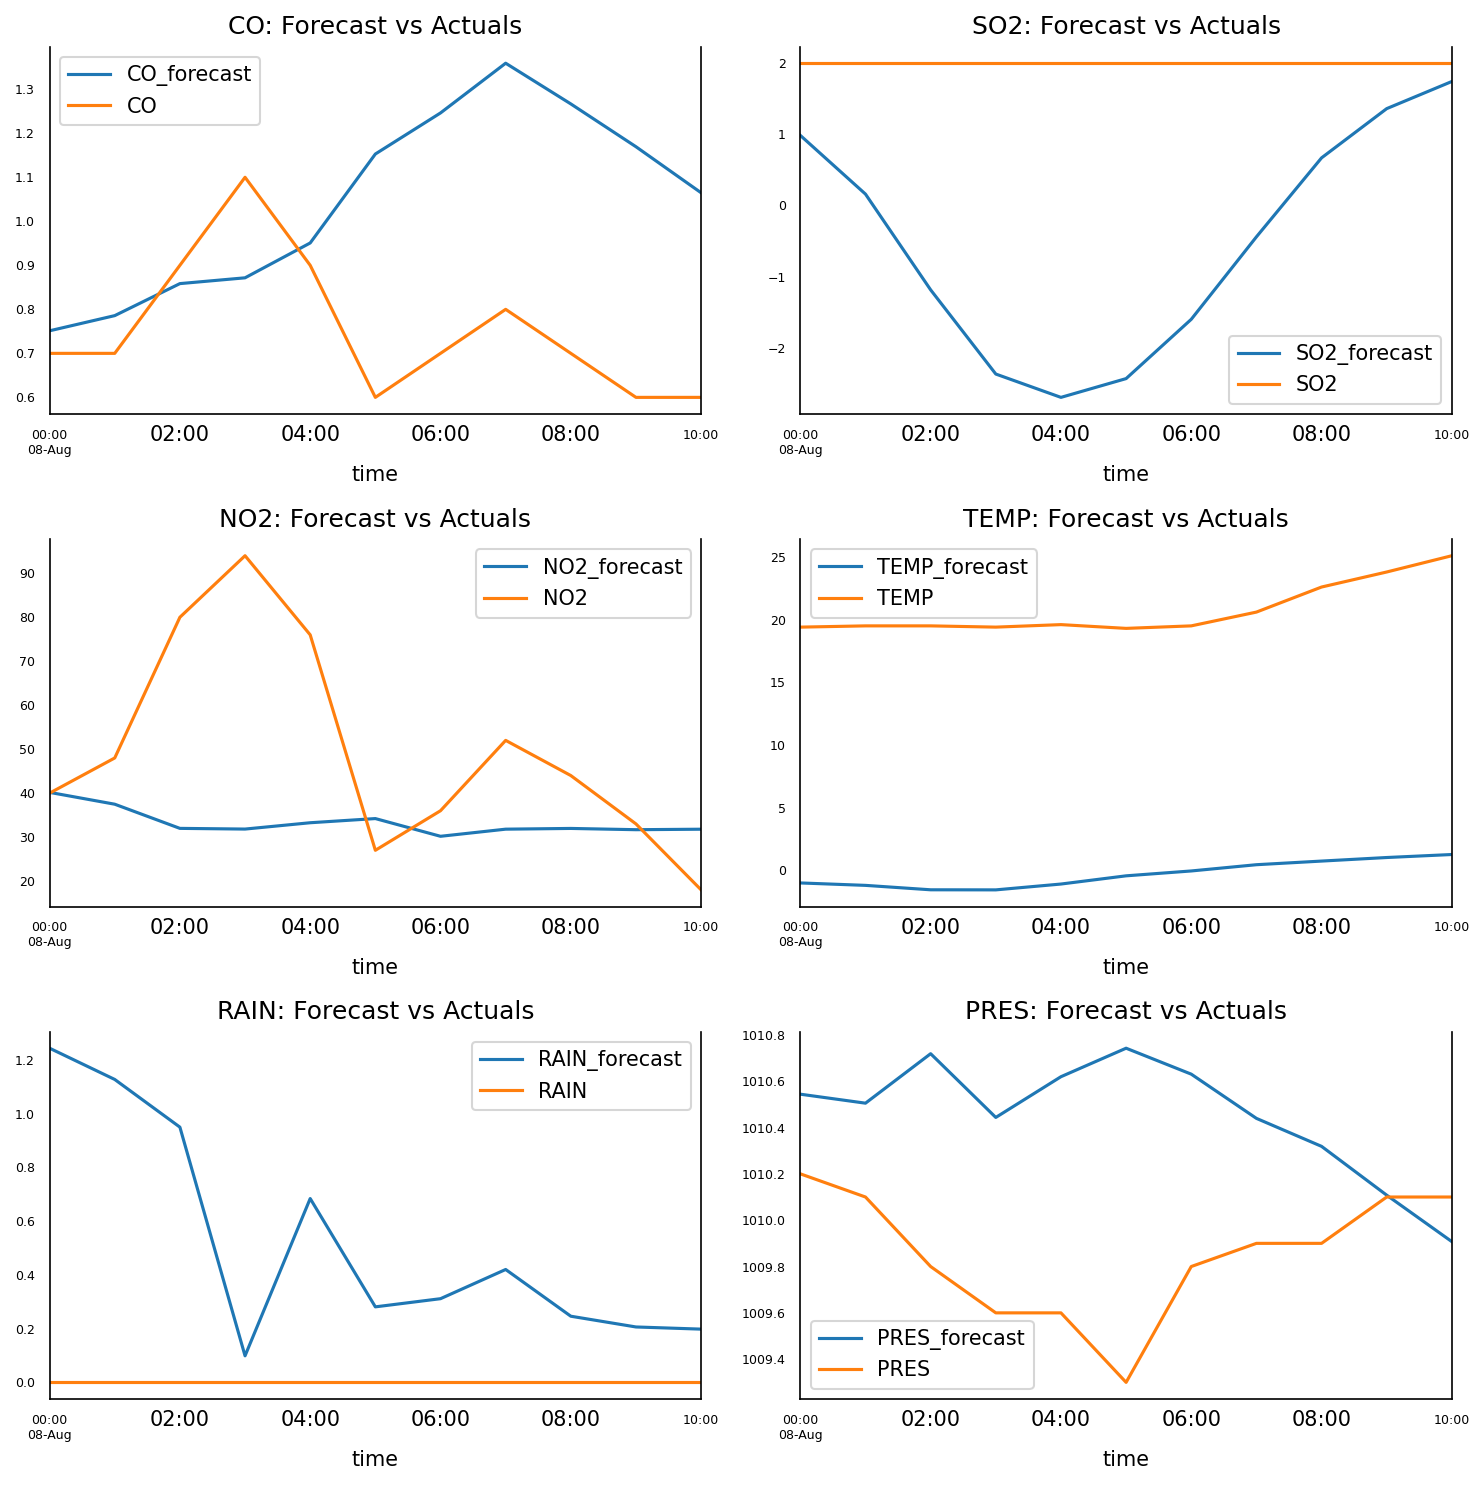

In [48]:
fig, axes = plt.subplots(nrows=int(len(df2.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df2.columns, axes.flatten())):
    df_results2[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    valid2[col].plot(legend=True, ax=ax)
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()


In [49]:
test=valid2

In [50]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: CO')
accuracy_prod = forecast_accuracy(df_results2['CO_forecast'].values, test['CO'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: SO2')
accuracy_prod = forecast_accuracy(df_results2['SO2_forecast'].values, test['SO2'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: NO2')
accuracy_prod = forecast_accuracy(df_results2['NO2_forecast'].values, test['NO2'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: TEMP')
accuracy_prod = forecast_accuracy(df_results2['TEMP_forecast'].values, test['TEMP'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: RAIN')
accuracy_prod = forecast_accuracy(df_results2['RAIN_forecast'].values, test['RAIN'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: PRES')
accuracy_prod = forecast_accuracy(df_results2['PRES_forecast'].values, test['PRES'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Forecast Accuracy of: CO
mape :  0.4945
me :  0.2888
mae :  0.3379
mpe :  0.4484
rmse :  0.4095
corr :  -0.3575
minmax :  0.2895

Forecast Accuracy of: SO2
mape :  1.2645
me :  -2.529
mae :  2.529
mpe :  -1.2645
rmse :  2.9637
corr :  nan
minmax :  1.2645

Forecast Accuracy of: NO2
mape :  0.3585
me :  -16.5084
mae :  20.3606
mpe :  -0.1698
rmse :  28.5043
corr :  -0.1116
minmax :  0.3232

Forecast Accuracy of: TEMP
mape :  1.0193
me :  -21.0772
mae :  21.0772
mpe :  -1.0193
rmse :  21.1135
corr :  0.8594
minmax :  1.0193

Forecast Accuracy of: RAIN
mape :  inf
me :  0.5243
mae :  0.5243
mpe :  inf
rmse :  0.6531
corr :  nan
minmax :  1.0

Forecast Accuracy of: PRES
mape :  0.0006
me :  0.5978
mae :  0.6328
mpe :  0.0006
rmse :  0.7477
corr :  -0.5779
minmax :  0.0006


<ipython-input-50-ab63f61fe982>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-50-ab63f61fe982>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
C:\Users\10048\Anaconda\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\10048\Anaconda\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
